In [139]:
# import required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from numpy import array
from keras import models
from keras import layers
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt

print('tensorflow ver: {}'.format(tf.__version__))
print('nltk ver: {}'.format(nltk.__version__))
print('wordcloud ver: {}'.format(wordcloud.__version__))
print('numpy ver: {}'.format(np.__version__))
print('pandas ver: {}'.format(pd.__version__))
#print('matplotlib ver: {}'.format(plt.__version__))

tensorflow ver: 2.11.0
nltk ver: 3.8
wordcloud ver: 1.8.2.2
numpy ver: 1.23.5
pandas ver: 1.5.2


In [140]:
# read csv data
amazon = 'E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 2/data/amazon_cells_labelled.txt'
imdb =  'E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 2/data/imdb_labelled.txt'
yelp =  'E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 2/data/yelp_labelled.txt'
colnames=['text', 'label'] 
amazon_df = pd.read_csv(amazon, sep='\t', names=colnames, header=None)
imdb_df = pd.read_csv(imdb, sep='\t', names=colnames, header=None)
yelp_df = pd.read_csv(yelp, sep='\t', names=colnames, header=None)
df = pd.concat([amazon_df, imdb_df, yelp_df])
df = df.reset_index(drop=True)

print('{}\n{}'.format(df.info(), df.shape))
df.sample(5, random_state=0) # 5 random (0) rows of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2748 non-null   object
 1   label   2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB
None
(2748, 2)


,text,label
1801,They have horrible attitudes towards customers...,0
1590,10/10,1
2382,Ordered burger rare came in we'll done.,0
2447,"Anyways, The food was definitely not filling a...",0
1147,This is actually a very smart movie.,1


1    1386
0    1362
Name: label, dtype: int64


<AxesSubplot: >

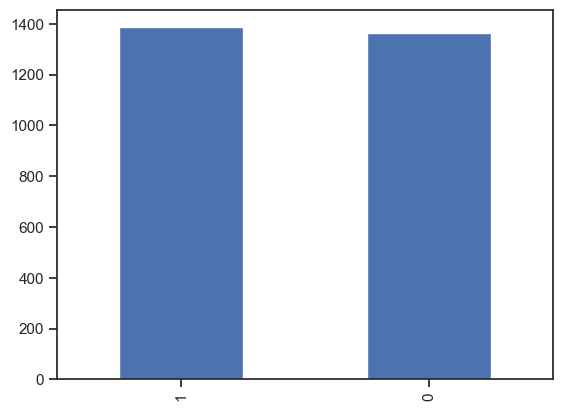

In [141]:
# plot scores as bar plot
print(df['label'].value_counts()) # output to notebook
pd.value_counts(df['label']).plot.bar() # create plot

In [142]:
# look at 'good' in a negative context
df[(df['text'].str.contains('good') >= 1) & (df['label'] == 0 )]

,text,label
81,Not a good bargain.,0
374,Not a good item.. It worked for a while then s...,0
455,Not good when wearing a hat or sunglasses.,0
563,If you are looking for a good quality Motorola...,0
637,"However, BT headsets are currently not good fo...",0
639,Disappointing accessory from a good manufacturer.,0
667,"Looks good in the picture, but this case was a...",0
741,"Couldn't use the unit with sunglasses, not goo...",0
767,I really wanted the Plantronics 510 to be the ...,0
806,At first I thought I was grtting a good deal a...,0


In [143]:
# look at 'great' in a negative context
df[(df['text'].str.contains('great') >= 1) & (df['label'] == 0 )]

,text,label
84,"This item worked great, but it broke after 6 m...",0
90,For a product that costs as much as this one d...,0
228,"I have had this phone for over a year now, and...",0
355,"The loudspeaker option is great, the bumpers w...",0
799,I tried talking real loud but shouting on the ...,0
914,"My phone sounded OK ( not great - OK), but my ...",0
1019,The structure of this film is easily the most...,0
1072,"All in all, a great disappointment.",0
1136,"In fact, it's hard to remember that the part ...",0
1283,"And, FINALLY, after all that, we get to an end...",0


In [144]:
# look at 'bad' in a positive context
df[(df['text'].str.contains('bad') >= 1) & (df['label'] == 1 )]

,text,label
1135,You'll love it! \t1\r\nThis movie is BAD. \t...,1
1245,The last 15 minutes of movie are also not bad ...,1
1379,The film's sole bright spot was Jonah Hill (wh...,1
1596,"Predictable, but not a bad watch.",1
1625,I struggle to find anything bad to say about i...,1
1646,"With great sound effects, and impressive spec...",1


In [145]:
# descriptive stattics
print(type(df['label']))
print(df['label'].info())
df.describe()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
RangeIndex: 2748 entries, 0 to 2747
Series name: label
Non-Null Count  Dtype
--------------  -----
2748 non-null   int64
dtypes: int64(1)
memory usage: 21.6 KB
None


,label
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [146]:
# retype label data

In [147]:
# remove punctuation
def remove_punctuation(text: str) -> str:
    '''remove punctuation from text'''
    final = "".join(u for u in text if u not in (
        "?", ".", ";", ":", "!", '"', ','))
    return final # updated string
print('before: {}'.format(df['text'].loc[0]))
df['text'] = df['text'].apply(remove_punctuation)
print('\nafter: {}'.format(df['text'].loc[0]))

before: So there is no way for me to plug it in here in the US unless I go by a converter.

after: So there is no way for me to plug it in here in the US unless I go by a converter


In [148]:
df['text']

0       So there is no way for me to plug it in here i...
1                               Good case Excellent value
2                                   Great for the jawbone
3       Tied to charger for conversations lasting more...
4                                        The mic is great
                              ...                        
2743    I think food should have flavor and texture an...
2744                              Appetite instantly gone
2745    Overall I was not impressed and would not go back
2746    The whole experience was underwhelming and I t...
2747    Then as if I hadn't wasted enough of my life t...
Name: text, Length: 2748, dtype: object

In [149]:
# lower case
print('before: {}'.format(df['text'].loc[0]))
df['text'] = df['text'].astype(str).str.lower()
print('\nafter: {}'.format(df['text'].loc[0]))

before: So there is no way for me to plug it in here in the US unless I go by a converter

after: so there is no way for me to plug it in here in the us unless i go by a converter


In [150]:
# first tokenization
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
print('before: {}'.format(df['text'].loc[0]))
df['text_token']=df['text'].apply(regexp.tokenize)
print('\nafter: {}'.format(df['text_token'].loc[0]))

# what is type of the new field
print('\ntext_token type: {}'.format(type(df['text_token'])))

before: so there is no way for me to plug it in here in the us unless i go by a converter

after: ['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'i', 'go', 'by', 'a', 'converter']

text_token type: <class 'pandas.core.series.Series'>


In [151]:
df['text_token']

0       [so, there, is, no, way, for, me, to, plug, it...
1                          [good, case, excellent, value]
2                              [great, for, the, jawbone]
3       [tied, to, charger, for, conversations, lastin...
4                                   [the, mic, is, great]
                              ...                        
2743    [i, think, food, should, have, flavor, and, te...
2744                          [appetite, instantly, gone]
2745    [overall, i, was, not, impressed, and, would, ...
2746    [the, whole, experience, was, underwhelming, a...
2747    [then, as, if, i, hadn, t, wasted, enough, of,...
Name: text_token, Length: 2748, dtype: object

In [152]:
# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
print(stopwords[0:20]) # just first 20 stopwords...
#my_stopwords = ['https', 'good', 'great', 'bad']
my_stopwords = ['https']
stopwords.extend(my_stopwords)
print('\nbefore: {}'.format(df['text'].loc[0]))
df['text_token'] = df['text_token'].apply(
    lambda x: [item for item in x if item not in stopwords])
print('\nafter: {}'.format(df['text_token'].loc[0]))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']

before: so there is no way for me to plug it in here in the us unless i go by a converter

after: ['way', 'plug', 'us', 'unless', 'go', 'converter']


In [153]:
# remove infrequent words
df['text_string'] = df['text_token'].apply(
    lambda x: ' '.join([item for item in x if len(item)>2]))
all_words = ' '.join([word for word in df['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
print(fdist)
cutoff = 1 # drop words occurring less than certain amount
print('\nbefore: {}'.format(df['text'].loc[0]))
df['text_string_fdist'] = df['text_token'].apply(
    lambda x: ' '.join([item for item in x if fdist[item] >= cutoff ]))
print('\nafter (text_string): {}'.format(df['text_string'].loc[0]))
print('\nafter (text_string_fdist): {}'.format(df['text_string_fdist'].loc[0]))

<FreqDist with 5023 samples and 17885 outcomes>

before: so there is no way for me to plug it in here in the us unless i go by a converter

after (text_string): way plug unless converter

after (text_string_fdist): way plug unless converter


In [154]:
# lemmatize 
wordnet_lem = WordNetLemmatizer()
print('\nbefore: {}'.format(df['text'].loc[0]))
df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)
print('\nafter (text_string_lem): {}'.format(df['text_string_lem'].loc[0]))


before: so there is no way for me to plug it in here in the us unless i go by a converter

after (text_string_lem): way plug unless converter


In [155]:
# Defining our word cloud drawing function
# adapted from Assaker (2022)
# https://github.com/JosephAssaker/Twitter-Sentiment-Analysis-Classical-Approach-VS-Deep-Learning/blob/master/Twitter%20Sentiment%20Analysis%20-%20Classical%20Approach%20VS%20Deep%20Learning.ipynb
def plot_wordcloud(title: str, data, color = 'black'):
    print(title) # output to notebook
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 2500,
                          height = 2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show() # create output plot

[('good', 229), ('great', 208), ('movie', 181), ('phone', 165), ('film', 163), ('one', 145), ('like', 125), ('food', 125), ('place', 114), ('time', 112), ('service', 108), ('really', 103), ('bad', 102), ('well', 88), ('would', 87), ('best', 78), ('even', 77), ('ever', 76), ('also', 74), ('back', 73)]


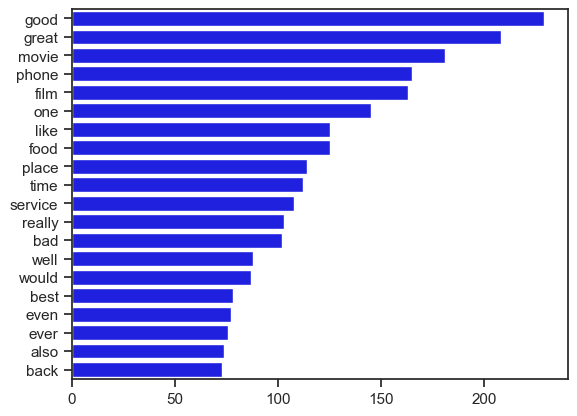

In [156]:
# finding most common words
n_common = 20
all_words_lem = ' '.join([word for word in df['text_string_lem']])
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)
top_x_words = fd.most_common(n_common)
fdist = pd.Series(dict(top_x_words)) # data converted to series
import seaborn as sns
sns.set_theme(style="ticks")
sns.barplot(y=fdist.index, x=fdist.values, color='blue');
print(fd.most_common(n_common))

(-0.5, 599.5, 399.5, -0.5)

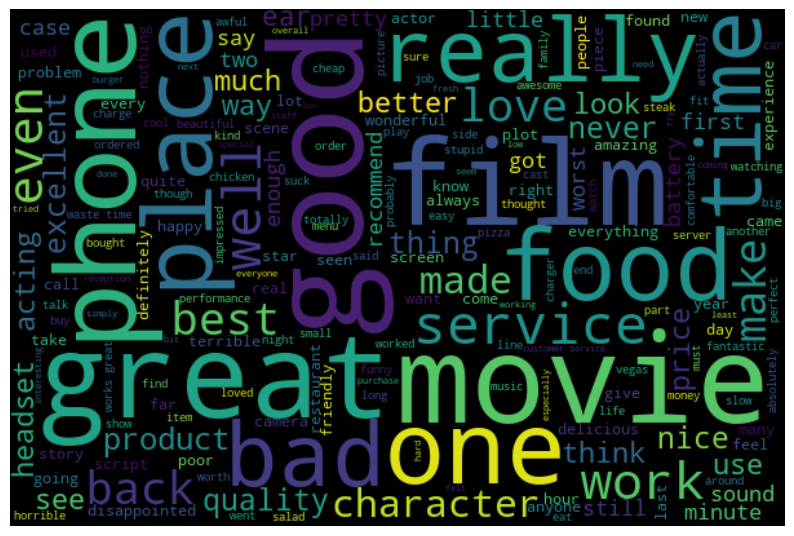

In [157]:
# wordcloud
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [158]:
# review what the data looks like after cleaning
print('{}\n{}'.format(df.info(), df.shape))
df.sample(3, random_state=0) # 5 random (0) rows of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               2748 non-null   object
 1   label              2748 non-null   int64 
 2   text_token         2748 non-null   object
 3   text_string        2748 non-null   object
 4   text_string_fdist  2748 non-null   object
 5   text_string_lem    2748 non-null   object
dtypes: int64(1), object(5)
memory usage: 128.9+ KB
None
(2748, 6)


,text,label,text_token,text_string,text_string_fdist,text_string_lem
1801,they have horrible attitudes towards customers...,0,"[horrible, attitudes, towards, customers, talk...",horrible attitudes towards customers talk one ...,horrible attitudes towards customers talk one ...,horrible attitudes towards customers talk one ...
1590,10/10,1,"[10, 10]",,,
2382,ordered burger rare came in we'll done,0,"[ordered, burger, rare, came, done]",ordered burger rare came done,ordered burger rare came done,ordered burger rare came done


In [159]:
# export clean data
f = 'E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 2/data/213_1_clean_data.txt'
df.to_csv(f, index=True, header=True)

In [160]:
# train test split
X = df['text_string_lem']
y = df['label']
seed = 42 # try different seeds
test_split = 0.05 # 0.2 best so far
X_train, X_test, y_train, y_test = tts(X, y, 
        test_size=test_split, random_state=seed)
print(X_train[0:3]) # df['text_string_lem']
print('X_train shape-type: {}-{}'.format(X_train.shape, type(X_train)))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape-type: {}-{}'.format(y_train.shape, type(y_train)))
print('y_test shape: {}'.format(y_test.shape))

1207                                       rather enjoyed
567     great new packaged nice works good problems ca...
2710    quite disappointed although blame needs placed...
Name: text_string_lem, dtype: object
X_train shape-type: (2610,)-<class 'pandas.core.series.Series'>
X_test shape: (138,)
y_train shape-type: (2610,)-<class 'pandas.core.series.Series'>
y_test shape: (138,)


C:\Users\nsgoo\AppData\Local\Temp\ipykernel_23500\1579190229.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(X_train[0:3]) # df['text_string_lem']


In [161]:
# second tokenizer words -> numbers
n_token_words = 4425 # best so far = 5000
tokenizer = Tokenizer(num_words=n_token_words)
#print('\ntype: {}\nbefore:\n{}'.format(type(X_test), X_test[0]))
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train) # ndarry/df -> list
X_test = tokenizer.texts_to_sequences(X_test)
#print('\ntype: {}\nafter:\n{}'.format(type(X_test), X_test[0])) # now a list

In [162]:
print(type(X_test))

<class 'list'>


In [163]:
#X_train[0:3] # tokenized

In [164]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 64
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
#np.set_printoptions(threshold=np.inf)
print('vocab_size: {}'.format(vocab_size))
print('maxlen: {}'.format(maxlen))
X_test[0] # now a padded list

vocab_size: 4880
maxlen: 64


array([ 629,  388,  192, 4174,  563,  329,    1,    7,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [165]:
# reset options
#pd.reset_option('all') 

In [166]:
#X_train[0:3] # padded

In [167]:
# define model 
dropout = 0.4 # use dropout = 0 to specify not dropout layer
output_dim = 2000 # vocab_size # 1-1 mapping to vocab word
model = models.Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=maxlen))
if(dropout > 0):
    model.add(layers.Dropout(dropout))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 64, 2000)          9760000   
                                                                 
 dropout_1 (Dropout)         (None, 64, 2000)          0         
                                                                 
 flatten_1 (Flatten)         (None, 128000)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 128001    
                                                                 
Total params: 9,888,001
Trainable params: 9,888,001
Non-trainable params: 0
_________________________________________________________________
None


In [168]:
# compile model
model.compile(
            optimizer='adam', 
            loss='binary_crossentropy', 
            metrics=['acc'])

In [169]:
# save model in SavedModel format
# prior to saving the model, you need to compile the model
from datetime import datetime
now = datetime.now() # current date and time
date_time_stamp = now.strftime("_%y%m%d_%H%M")
model.save('models/final' + date_time_stamp)

INFO:tensorflow:Assets written to: models/final_221219_0916\assets


INFO:tensorflow:Assets written to: models/final_221219_0916\assets


In [170]:
val_split = .2 # .3 or .4 working best so far
len(X_train)
val_split = int(val_split * len(X_train))
x_val = X_train[:val_split]
partial_x_train = X_train[val_split:]
y_val = y_train[:val_split]
partial_y_train = y_train[val_split:]

C:\Users\nsgoo\AppData\Local\Temp\ipykernel_23500\3911776385.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_val = y_train[:val_split]
C:\Users\nsgoo\AppData\Local\Temp\ipykernel_23500\3911776385.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  partial_y_train = y_train[val_split:]


In [171]:
batch_size = 32 # 256 best so far
n_epochs = 300 # 100-200 best so far
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=batch_size, 
                    epochs=n_epochs,
                    verbose=0, 
                    validation_data=(x_val, y_val))

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
# adapted from Assaker (2022)
def custom_loss_acc_plot(
    ax: ax, 
    hist: dict, 
    title: str,
    n_epochs: int,
    batch_size: int,
    vocab_size: int,
    output_dim: int,
    test_split: int,
    val_split: int,
    maxlen: int,
    seed: int,
    summary: str,
    top: int,
    score: np.ndarray,
    n_token_words: int,
    dropout: float
) -> ax:
    """
    custom subplot returns
    """
    # plot loss on axis=0
    y1 = hist['loss'] 
    y2 = hist['val_loss']
    x = range(1, len(y1) + 1) # x-axis = Epochs 
    ax[0].plot(x, y1, 'b+', label='Training loss')
    ax[0].plot(x, y2, 'b', label='Validation loss')
    ax[0].set_title('Loss')
    ax[0].text(.05 * n_epochs, top - .5, 'n_epochs: ' + str(n_epochs), fontsize=10) 
    ax[0].text(.05 * n_epochs, top - .8, 'batch_size: ' + str(batch_size), fontsize=10) 
    ax[0].text(.05 * n_epochs, top - 1.1, 'vocab_size: ' + str(vocab_size), fontsize=10)
    ax[0].text(.05 * n_epochs, top - 1.4, 'test_split: ' + str(test_split), fontsize=10) 
    ax[0].text(.05 * n_epochs, top - 1.7, 'val_split: ' + str(val_split), fontsize=10) 
    ax[0].text(.05 * n_epochs, top - 2.0, 'maxlen: ' + str(maxlen), fontsize=10) 
    ax[0].text(.05 * n_epochs, top - 2.3, 'seed: ' + str(seed), fontsize=10)
    ax[0].text(.05 * n_epochs, top - 2.6, 'test scores: ' + str(score), fontsize=10)
    ax[0].text(.05 * n_epochs, top - 2.9, 'output_dim: ' + str(output_dim), fontsize=10)
    ax[0].text(.05 * n_epochs, top - 3.2, 'n_token_words: ' + str(n_token_words), fontsize=10)
    if(dropout > 0):
        ax[0].text(.05 * n_epochs, top - 3.5, 'dropout: ' + str(dropout), fontsize=10)
    ax[0].grid(True)
    ax[0].axis('on') 
    ax[0].set_ylim(0,5)
    #ax[0].set_ylim(0,1)
    #ax[0].yaxis.set_major_locator((integer=True))
    ax[0].legend()   

    # plot acc on axis=1
    y1 = hist['acc'] 
    y2 = hist['val_acc']
    x = range(1, len(y1) + 1) # x-axis = Epochs 
    ax[1].plot(x, y1, 'b+', label='Training acc')
    ax[1].plot(x, y2, 'b', label='Validation acc')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].grid(True)
    ax[1].axis('on')
    ax[1].legend()
    
    # plot model summary on axis=2  
    ax[2].text(0, -.2, summary, fontsize=10) 
    ax[2].grid(False)
    ax[2].axis('off')    
    return (ax)

title = 'Loss-Accuracy'
fig, ax = plt.subplots(3, sharex=False, figsize=(7,10))
stringlist = []
model.summary(print_fn=lambda x: stringlist.append(x))
short_model_summary = "\n".join(stringlist)
score = model.evaluate(X_test, y_test, verbose=0)
top = 5
custom_loss_acc_plot(
    ax, 
    history.history, 
    title,
    n_epochs,
    batch_size,
    vocab_size,
    output_dim,
    test_split,
    val_split,
    maxlen,
    seed,
    short_model_summary,
    top,
    score,
    n_token_words,
    dropout
)

from datetime import datetime
now = datetime.now() # current date and time
title += now.strftime("_%y%m%d_%H%M")
ax[0].text(.05 * n_epochs, top, title, fontsize=12) 
plt.close()

In [ ]:
# beeps to indicate end of notebook
import winsound
n_beeps = int((score[1]*10-5))
for i in range(5):
    winsound.Beep(700, 100)
for i in range(n_beeps):
    winsound.Beep(500, 200)